# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html

url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"

In [4]:
browser.visit(url)

In [5]:
html = browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [6]:
# Create a Beautiful Soup Object
soup = soup(html, 'html.parser')

In [7]:
# Extract all rows of data
rows_of_data = soup.find_all("tr", class_="data-row")
# Print and look at the first row of data
rows_of_data[0]

<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [8]:
# Create an empty list
table_data = []

In [9]:
# Loop through the scraped data to create a list of rows
for row in rows_of_data:
    # Collect the data in each row of the web page
    td = row.find_all('td')
    # Collect text for each value in the row
    row = [col.text for col in td]
    # Append the data for each row to the list
    table_data.append(row)

In [10]:
# Print and look at the first row of data
table_data[0]

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']

In [11]:
# Collect the header row / a list of the column names
column_names = soup.find_all("th")
column_header = []
for column in column_names:
    word = column.text
    column_header.append(word)
column_header

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [12]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Convert the list or data in rows to a Pandas DataFrame
df = pd.DataFrame(table_data)
df.columns = column_header


In [13]:
# Confirm DataFrame was created successfully
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [14]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [15]:
# Change data types for data analysis
df.terrestrial_date = pd.to_datetime(df.terrestrial_date)
df.sol = df.sol.astype('int')
df.ls = df.ls.astype('int')
df.month = df.month.astype('int')
df.min_temp = df.min_temp.astype('float')
df.pressure = df.pressure.astype('float')

In [16]:
# Confirm type changes were successful by examining data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 102.2+ KB


### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [17]:
# Exploring data on column 'month'
df["month"]

0       6
1       6
2       6
3       6
4       6
       ..
1862    5
1863    5
1864    5
1865    5
1866    5
Name: month, Length: 1867, dtype: int64

In [18]:
# 1. How many months are there on Mars? 12
df["month"].nunique()
# df["month"].unique()
# df["month"].value_counts().sort_index()


12

In [19]:
# Exploring the column of data "sol" as the number of elapsed sols (Martian days)
df["sol"].value_counts().sort_index()

10      1
11      1
12      1
13      1
14      1
       ..
1973    1
1974    1
1975    1
1976    1
1977    1
Name: sol, Length: 1867, dtype: int64

In [20]:
# Exploring the first row of column of data "sol" as the number of elapsed sols (Martian days)
sol_data_first_day = df["sol"].head(1)
sol_data_first_day

0    10
Name: sol, dtype: int64

In [21]:
# Exploring the last row of column of data "sol" as the number of elapsed sols (Martian days)
sol_data_last_day = df["sol"].tail(1)
sol_data_last_day

1866    1977
Name: sol, dtype: int64

In [22]:
# 2. How many Martian days' worth of data are there?  1867
df["sol"].nunique()


1867

In [23]:
# 3. What is the average low temperature by month?
# Keep in mind that the average of "sol" and "ls" columns is not a required/relevant calculation for these questions.
temp_month_df =df.groupby(["month"]).mean()
new_temp_month_df=temp_month_df.reset_index()
rounded_new_temp_month_df = new_temp_month_df.round(2)
rounded_new_temp_month_df

,month,sol,ls,min_temp,pressure
0,1,1077.57,15.28,-77.16,862.49
1,2,1175.85,44.26,-79.93,889.46
2,3,1204.41,75.01,-83.31,877.32
3,4,1244.50,104.37,-82.75,806.33
4,5,1182.69,132.89,-79.31,748.56
5,6,750.83,164.90,-75.30,745.05
6,7,715.11,194.89,-72.28,795.11
7,8,795.33,224.35,-68.38,873.83
8,9,861.19,254.05,-69.17,913.31
9,10,1034.67,286.33,-71.98,887.31


In [24]:
# Creating a variable for the x-axis to plot
month = list(rounded_new_temp_month_df['month'])
month

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [25]:
# Creating a variable for the y-axis to plot
average_min_temp=list(rounded_new_temp_month_df['min_temp'])
average_min_temp

[-77.16,
 -79.93,
 -83.31,
 -82.75,
 -79.31,
 -75.3,
 -72.28,
 -68.38,
 -69.17,
 -71.98,
 -71.99,
 -74.45]

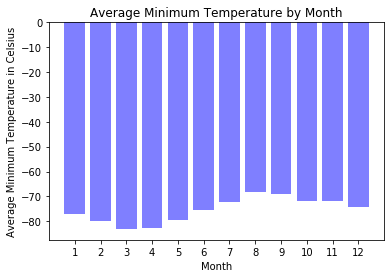

In [26]:
# Plot the average temperature by month
plt.bar(month, average_min_temp, color='b', alpha=0.5, align="center")
plt.xticks(month)
# plt.xlim(len(month))
# plt.ylim(0, max(average_min_temp)+10)
plt.title("Average Minimum Temperature by Month")
plt.xlabel("Month")
plt.ylabel("Average Minimum Temperature in Celsius")
plt.gcf
plt.savefig("Images/AverageTemperatureMonth.png", dpi=100)
plt.show()

In [27]:
# Finding the minimum average temperature to determine, which is the coldest Month. Which is the 3rd Month.
rounded_new_temp_month_df['min_temp'].min()

-83.31

In [28]:
# Finding the maximum average temperature to determine, which is the warmest Month. Which is the 8th Month.
rounded_new_temp_month_df['min_temp'].max()

-68.38

# Identify the coldest and hottest months in Curiosity's location

Coldest Month 3 -83.31
Hottest Month 8 -68.38

In [29]:
# 4. Average pressure by Martian month.
# I could have used rounded_new_temp_month_df from previous code cells, but with the different name I thought I'd just run the cell again.
# Keep in mind that the average of "sol" and "ls" columns is not a required/relevant calculation for these questions.
pressure_month_df =df.groupby(["month"]).mean()
new_pressure_month_df=pressure_month_df.reset_index()
rounded_new_pressure_month_df = new_pressure_month_df.round(2)
rounded_new_pressure_month_df

,month,sol,ls,min_temp,pressure
0,1,1077.57,15.28,-77.16,862.49
1,2,1175.85,44.26,-79.93,889.46
2,3,1204.41,75.01,-83.31,877.32
3,4,1244.50,104.37,-82.75,806.33
4,5,1182.69,132.89,-79.31,748.56
5,6,750.83,164.90,-75.30,745.05
6,7,715.11,194.89,-72.28,795.11
7,8,795.33,224.35,-68.38,873.83
8,9,861.19,254.05,-69.17,913.31
9,10,1034.67,286.33,-71.98,887.31


In [30]:
# Creating a variable for the x-axis to plot
pressure_month = list(rounded_new_pressure_month_df['month'])
pressure_month

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [31]:
# Creating a variable for the y-axis to plot
average_pressure_month = list(rounded_new_pressure_month_df['pressure'])
average_pressure_month

[862.49,
 889.46,
 877.32,
 806.33,
 748.56,
 745.05,
 795.11,
 873.83,
 913.31,
 887.31,
 857.01,
 842.16]

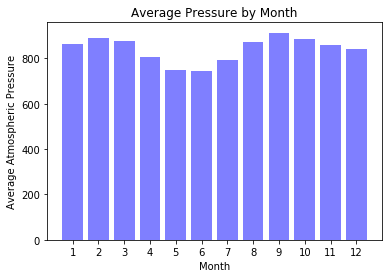

In [32]:
# Plot the average pressure by month
plt.bar(pressure_month, average_pressure_month, color='b', alpha=0.5, align="center")
plt.xticks(pressure_month)
# plt.xlim(len(pressure_month))
# plt.ylim(0, max(average_pressure_month)+10)
plt.title("Average Pressure by Month")
plt.xlabel("Month")
plt.ylabel("Average Atmospheric Pressure")
plt.gcf
plt.savefig("Images/AveragePressureMonth.png", dpi=100)
plt.show()

In [33]:
# Finding the minimum atmospheric pressure to determine, which Month has the lowest average atmospheric pressure. 
# Which is the 6th Month.
rounded_new_pressure_month_df['pressure'].min()

745.05

In [34]:
# Finding the maximum atmospheric pressure to determine, which Month has the highest average atmospheric pressure. 
# Which is the 9th Month.
rounded_new_pressure_month_df['pressure'].max()

913.31

Which months have the lowest and the highest atmospheric pressure on Mars? 
The month with the lowest average atmospheric pressure on Mars was Month 6, recording an average of 745.05 (atm)
The month with the highest average atmospheric pressure on Mars was Month 9, recording an average of 913.31 (atm)


About how many terrestrial (Earth) days exist in a Martian year? 
To answer this question:
Consider how many days elapse on Earth in the time that Mars circles the Sun once.
Visually estimate the result by plotting the daily minimum temperature.

In [35]:
# Print and look at the first row of data for column "terrestrial_date"
terrestrial_days = list(df['terrestrial_date'])
terrestrial_days[0]

Timestamp('2012-08-16 00:00:00')

In [36]:
# Print and look at the data for column "min_temp"
min_temp = list(df['min_temp'])
min_temp

[-75.0,
 -76.0,
 -76.0,
 -74.0,
 -74.0,
 -78.0,
 -77.0,
 -76.0,
 -74.0,
 -74.0,
 -75.0,
 -75.0,
 -75.0,
 -76.0,
 -75.0,
 -75.0,
 -75.0,
 -74.0,
 -74.0,
 -73.0,
 -73.0,
 -73.0,
 -73.0,
 -73.0,
 -73.0,
 -75.0,
 -75.0,
 -75.0,
 -75.0,
 -74.0,
 -75.0,
 -74.0,
 -74.0,
 -75.0,
 -75.0,
 -74.0,
 -72.0,
 -76.0,
 -74.0,
 -71.0,
 -72.0,
 -74.0,
 -73.0,
 -73.0,
 -74.0,
 -76.0,
 -75.0,
 -72.0,
 -72.0,
 -73.0,
 -74.0,
 -72.0,
 -73.0,
 -73.0,
 -71.0,
 -73.0,
 -72.0,
 -71.0,
 -73.0,
 -70.0,
 -72.0,
 -73.0,
 -73.0,
 -71.0,
 -71.0,
 -73.0,
 -70.0,
 -72.0,
 -72.0,
 -72.0,
 -70.0,
 -71.0,
 -71.0,
 -70.0,
 -70.0,
 -73.0,
 -71.0,
 -74.0,
 -74.0,
 -72.0,
 -70.0,
 -68.0,
 -71.0,
 -68.0,
 -68.0,
 -68.0,
 -66.0,
 -65.0,
 -67.0,
 -66.0,
 -67.0,
 -66.0,
 -66.0,
 -66.0,
 -65.0,
 -64.0,
 -65.0,
 -66.0,
 -65.0,
 -66.0,
 -69.0,
 -66.0,
 -67.0,
 -66.0,
 -65.0,
 -66.0,
 -67.0,
 -66.0,
 -65.0,
 -66.0,
 -66.0,
 -68.0,
 -66.0,
 -67.0,
 -67.0,
 -65.0,
 -65.0,
 -65.0,
 -65.0,
 -65.0,
 -67.0,
 -65.0,
 -65.0,
 -64.0,
 -65.0,


<function matplotlib.pyplot.show(*args, **kw)>

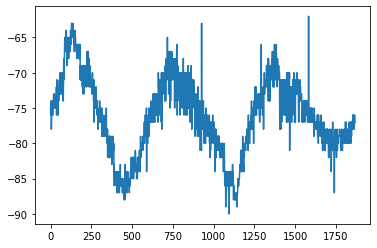

In [37]:
# Plot of daily minimum temperatures
df.min_temp.plot()
plt.show

In [41]:
750-125

625

# 5. How many terrestrial (earth) days are there in a Martian year?

~625 terrestrial (earth) days in a Martian year based on the plot of min-temp.
or
~664 terrestrial (earth) days in a Martian year.
This is based on scrolling through sol and month columns in data, explained below

# 5. How many terrestrial (earth) days are there in a Martian year?

Looking at the plot above I find the first highest point on the graph (highest min temperature) and check what day it might be on the x_axis, ~day 125, then find the next highest point on the graph (highest min temperature) and check what day it might be on the x_axis, ~day 750.

Based on this I deduce that there are ~ 625 terrestrial (earth) days in a Martian year.

The other thing to consider is this:
Having scrolled through the 'sol' column data
The first row = sol 10 month 6
then at sol 668 month 6 (the next 1st sol day of month 6)
then at sol 1337 month 6 (the next 1st sol day of month 6)
then at sol 1977 month 5 (could be more sol day for 5th month after last row)
So
668-10 sol days = 658 sol days in a year
1337-668 sol days = 669 sol days in a year
Average of these 2 values is 663.5

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [42]:
# Write the data to a CSV
df.to_csv("Images/data.csv", index_label="id")


In [43]:
browser.quit()